<a href="https://colab.research.google.com/github/jpmvbastos/AppliedEconometrics3/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1







In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sns.set_style('darkgrid')
from scipy import stats 
from scipy.optimize import minimize
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson
from statsmodels.base.model import GenericLikelihoodModel


In [ ]:
np.seterr('raise') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## 1) Estimating a demand function

Consider the following equation, where the quantity exported of a good ($Q$) is related to the export price ($P$) and the price of a substitute good ($P_s$) as:


$Q_t = \beta_1 + \frac{\beta_2(P^\lambda_t - 1)}{\lambda} + \frac{\beta_3(P^\lambda_{st} - 1)}{\lambda} + \epsilon_t$

In [23]:
# Import the data
df = pd.read_excel('data_1.xlsx')

### a) Estimate $\beta_1$, $\beta_2$, and $\beta_3$ by regressing $Q_t$, on $P$, and $P_s$. Interpret your results:

In [ ]:
print(sm.OLS(df.Q,df.iloc[:,1:]).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      Q   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              155.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                    2.05e-20
Time:                        23:18:57   Log-Likelihood:                         -290.22
No. Observations:                  45   AIC:                                      584.4
Df Residuals:                      43   BIC:                                      588.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

A $1 increase in the price of the good is associate with a reduction of 1.5 units in quantity exported, all else equal. 

A $1 increase in the price of the substitute good is associated with an increase of 4 units in quantity exported, all else equal.

### b) Estimate the parameters using maximum likelihood method and compare your results to (a).

Assume $\epsilon \sim N(0,\sigmaˆ2)$ 

This part was performed in Stata using the ```boxcox``` command. The results are presented below: 

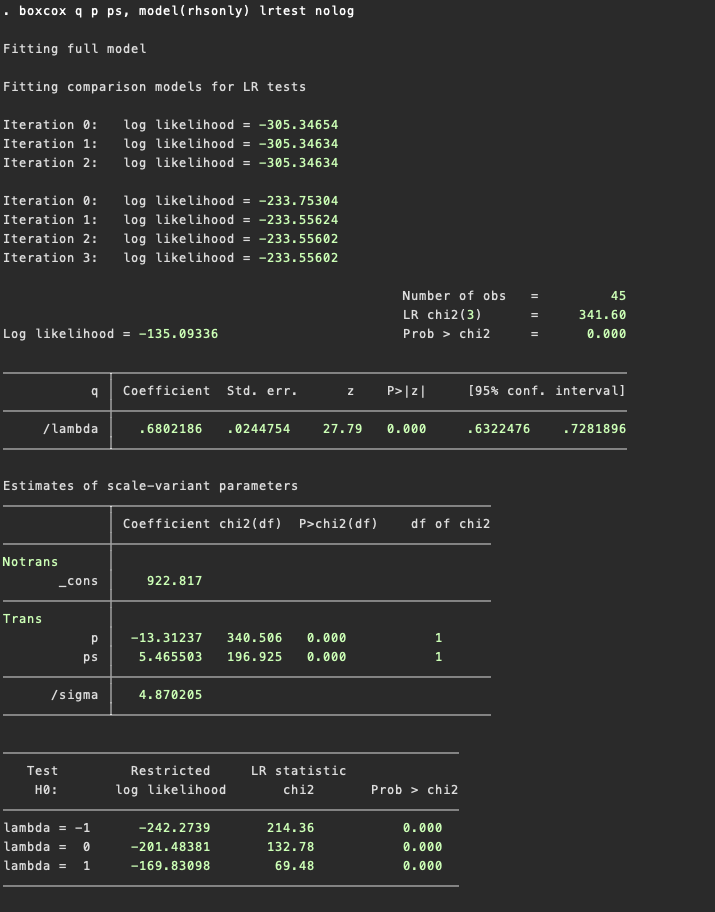

### c) Test the hypothesis $H_0: \beta_2 = -\beta_3$

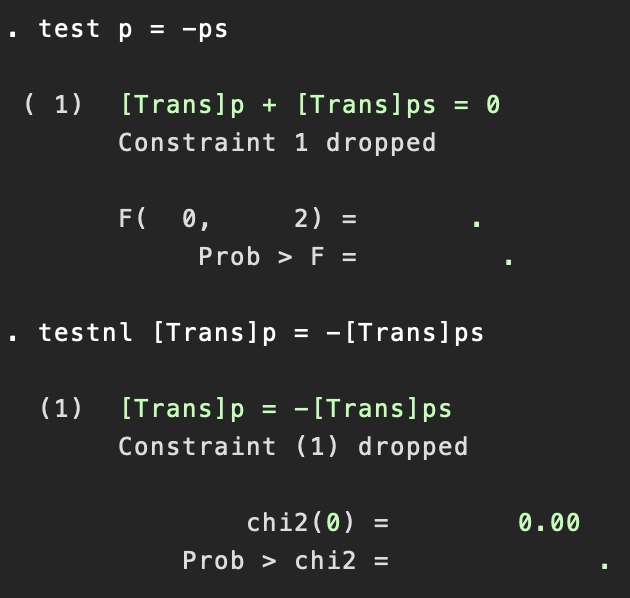

In Stata, Box-Cox estimates variances only for the $\lambda$ parameter, and formulas used in ```test```, and ```testnl``` are dependent on the estimated variances. The technical note in [boxcox postestimation commands](https://www.stata.com/manuals/rboxcoxpostestimation.pdf#rboxcoxpostestimation) (p.4), says that "use of these commands is limited and generally applicable only to inferences on the $\lambda$ and $\theta$ coefficients".

Thus, we can re-estimate the values using Stata's  ```mlexp``` command (also as a robustness check) and perform the tests again. 

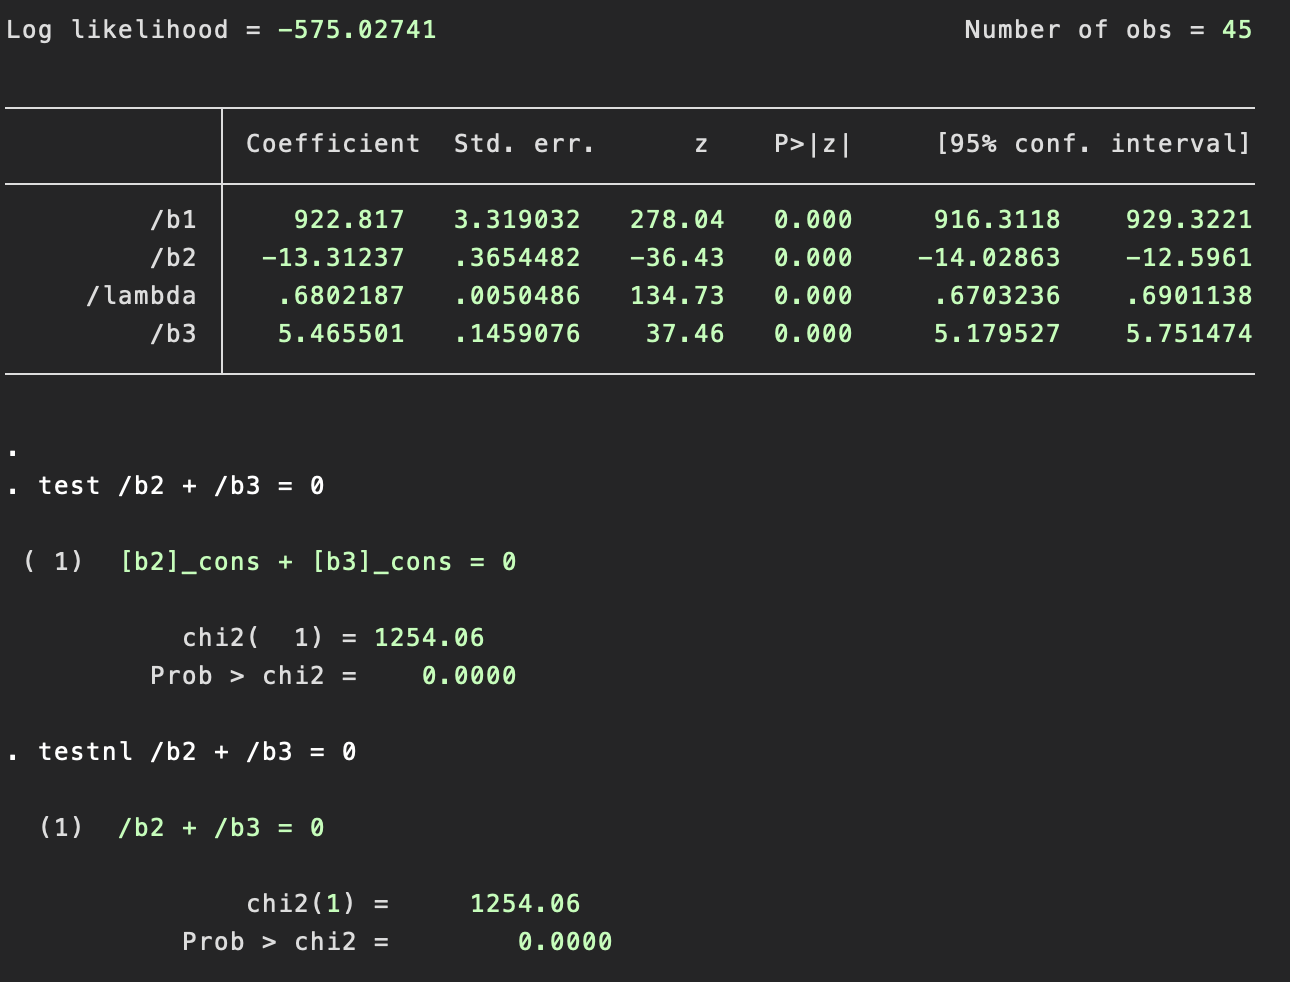

As it can be seem from the output table, the returned coefficients are identical to those obtained by the ```boxcox``` command. 

Moreover, the test indicate that we should reject the null hypothesis $\beta_2 = - \beta_3$

### d) Find own and cross-price elasticities at the mean

The own-price elasticity is given by

$\epsilon_{P} = \frac{\partial Q}{\partial P} \times \frac{P}{Q} = \frac{\lambda\beta_2}{\lambda}P^{\lambda-1} = \beta_2P^{\lambda-1} \times\frac{P}{Q}$

whereas the cross-price elasticity is given by 

$\epsilon_{PS} = \frac{\partial Q}{\partial P}\times \frac{PS}{Q} = \frac{\lambda \beta_3}{\lambda}PS^{\lambda -1} = \beta_3PS^{\lambda-1}\times\frac{PS}{Q}$



In [29]:
#Get mean values of P and PS and Q
Qbar = np.mean(df.Q)
Pbar = np.mean(df.P)
PSbar = np.mean(df.PS)

# Coefficients
lmbda = .6802186
b2 = -13.3123
b3 = 5.465503

own_elasticity = (b2*Pbar**(lmbda-1))*Pbar/Qbar
cross_elasticity = (b3*PSbar**(lmbda-1))*PSbar/Qbar

print('The Own-Price elasticity is =' + str(own_elasticity))
print('The Cross-Price elasticity is =' + str(cross_elasticity))

The Own-Price elasticity is =-1.494736647383519
The Cross-Price elasticity is =0.48982473455209813


### e) Comparing Models

Now, estimate the following model: 

$Q_t = \beta_1 + \frac{\beta_2(P^{\lambda_1}_t - 1)}{\lambda_1} + \frac{\beta_3(PS^{\lambda_2}_t - 1)}{\lambda_2} + \epsilon_t$

Which one do you choose?

Again, we will perform this estimation is Stata, using the ```mlexp```` command.

From the beggining, note that the difference between the model in (b) and the present model is that we allow $\lambda$ to vary. Choosing between the models is thus given by the test:

$H_0: \lambda_1 = \lambda_2$

$H_1: \lambda_1 \neq \lambda2$

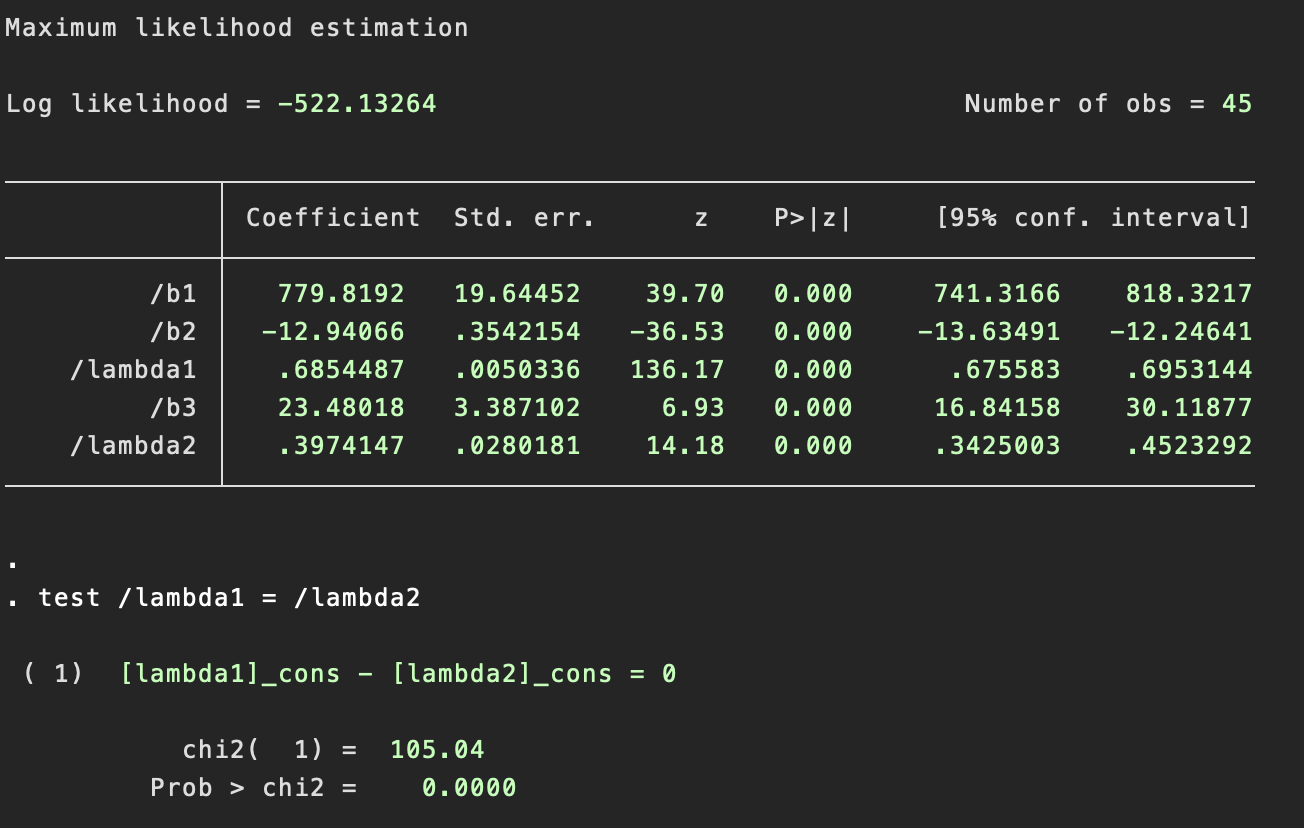

As the test indicates, $\lambda_1 \neq \lambda_2$, such that we choose the present model. 

## 2) Simulate a mixture of two normal populations

Assumptions: 

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$

$ x_1 \sim N(\mu_1, \sigma^2_1)$

$ x_2 \sim N(\mu_2, \sigma^2_2)$ 

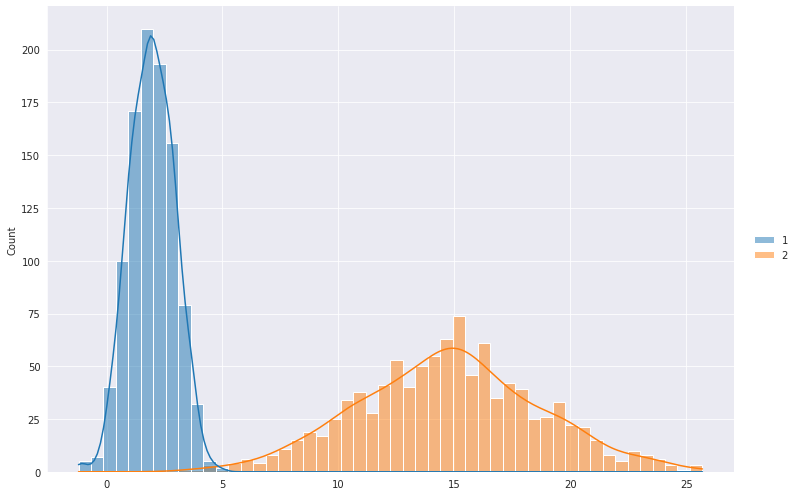

In [2]:
# Estipulate the parameters of the population
n=1000

#Generate x1
mu1 = 2
s1 = 1
x1 = np.random.normal(mu1,s1,n)

#Generate x2
mu2 = 15
s2 = 4
x2 = np.random.normal(mu2, s2, n)

#Generate error term:

e = np.random.normal(0,2,n)

#Create X matrix

X = np.array([np.ones(n), x1 , x2]).T
X = pd.DataFrame(X)
sns.displot(data=X.iloc[:,1:], bins=50, kde=True, height=7, aspect=1.5)


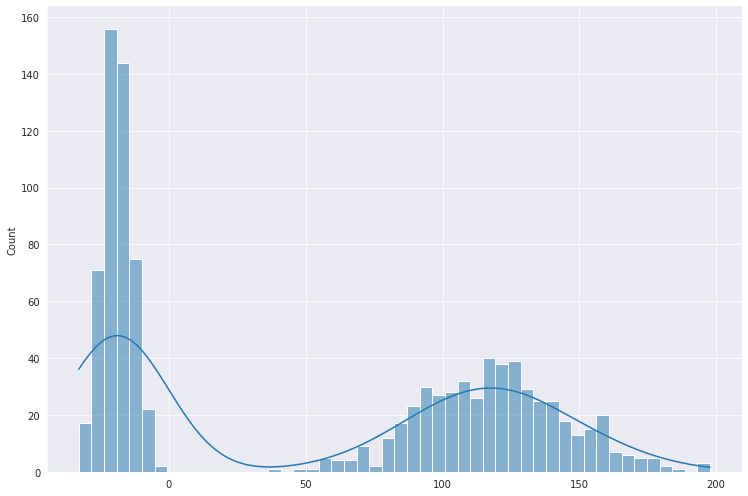

In [4]:
# Generate a 50/50 mixture of x1 and x2 – OK
mix_id = np.random.binomial(1, 0.50, 1000) 

# Generate Y as a random sample from each of these distributions

y = np.array([])
for i in range(0,n):
  if mix_id[i] ==1:
    y = np.append(y,5 + 6*x1[i] + 7*x2[i] + e[i])
  else:
    y = np.append(y,-2 + 0.5*x1[i] - 1.2*x2[i] + e[i])


sns.displot(y, bins=50, kde=True, height=7, aspect=1.5)

In [19]:
# Estimate y 
model1 = sm.OLS(y,X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.42
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.33e-05
Time:                        16:06:48   Log-Likelihood:                -5687.7
No. Observations:                1000   AIC:                         1.138e+04
Df Residuals:                     997   BIC:                         1.140e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              7.8141     10.055      0.777      0.4

Now we will export the data to run the Finite Mixture Model on Stata

In [9]:
y = pd.Series(y)
data = pd.concat([y,X], axis=1)
data.columns = ['y','cons','x1','x2']
data.to_excel('data_2.xlsx')

## 3) Monte Carlo Simulation

Simulate 1000 observations of a variable $income$ and a variable $gender$ and use these covariates to simulate 1000 observations of the number of credit card frauds using the Poisson distribution with $\lambda_i = exp(x_i'\beta)$

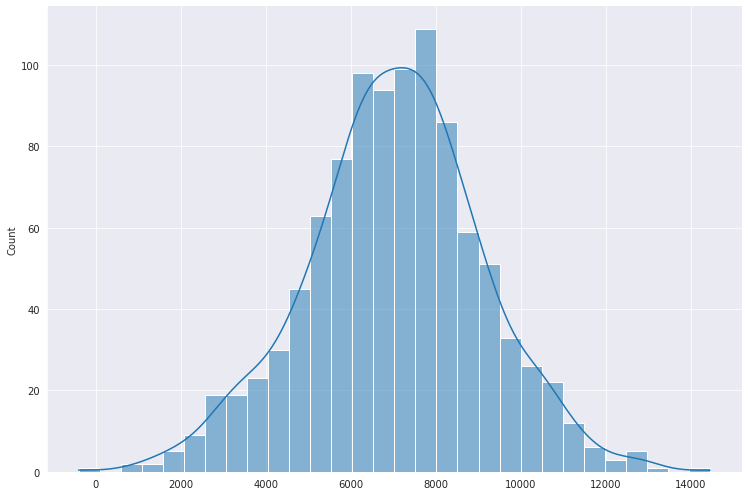

In [ ]:
# Assume mean monthly income is $7000 with a variance of $2000
income = np.random.lognormal(7000,2000,n)
sns.displot(income, kde=True, height=7, aspect=1.5)

In [ ]:
# Assume 55% of credit card owners are women
female = np.random.binomial(1, 0.55, 1000) 
print("In our sample, we have " + str(np.sum(female)) + " women.")

In our sample, we have 530 women.


Let's assume that the number of credit card frauds is given by:

$Fraud = exp(\beta_0 + \beta_1Income + \beta_2Female)$

where $\beta_0=5$, $\beta_1 = -0.025$ and $\beta_2 = -0.05$

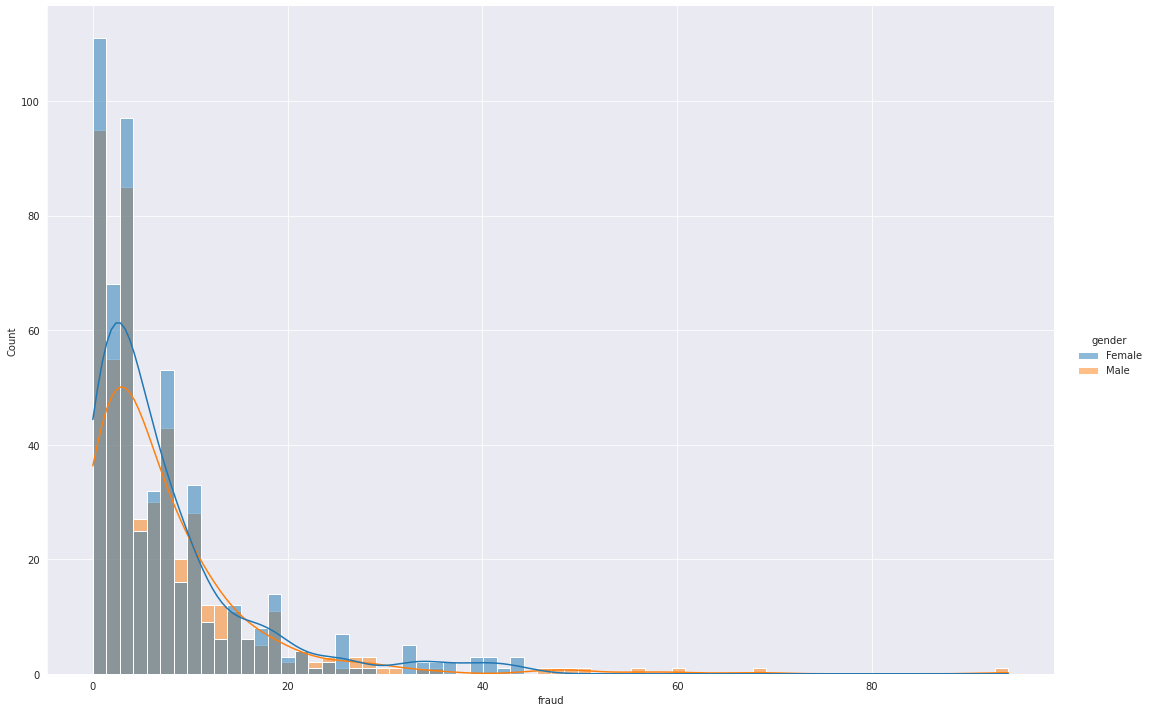

In [ ]:
# Generate X matrix
X = X = np.array([np.ones(n), income , female]).T
X = pd.DataFrame(X, columns=['cons','income', 'female'])

# Apply data generating process
Xb = 5 + -0.0005*income -0.025*female

# Create Lambda
l = np.exp(Xb)

fraud = np.random.poisson(l,n)
y = pd.Series(fraud)
data = pd.concat([y, X], axis=1).rename(columns={0:'fraud','female':'gender'})
data.gender = data.gender.replace({1:'Female', 0:'Male'})

sns.displot(data=data, x='fraud', hue='gender', kde=True, height=10, aspect=1.5)


### a) Assuming linearity, estimate the $\beta$ parameters

In [ ]:
#Generate 
print(sm.OLS(fraud,X).fit().summary())

NameError: ignored

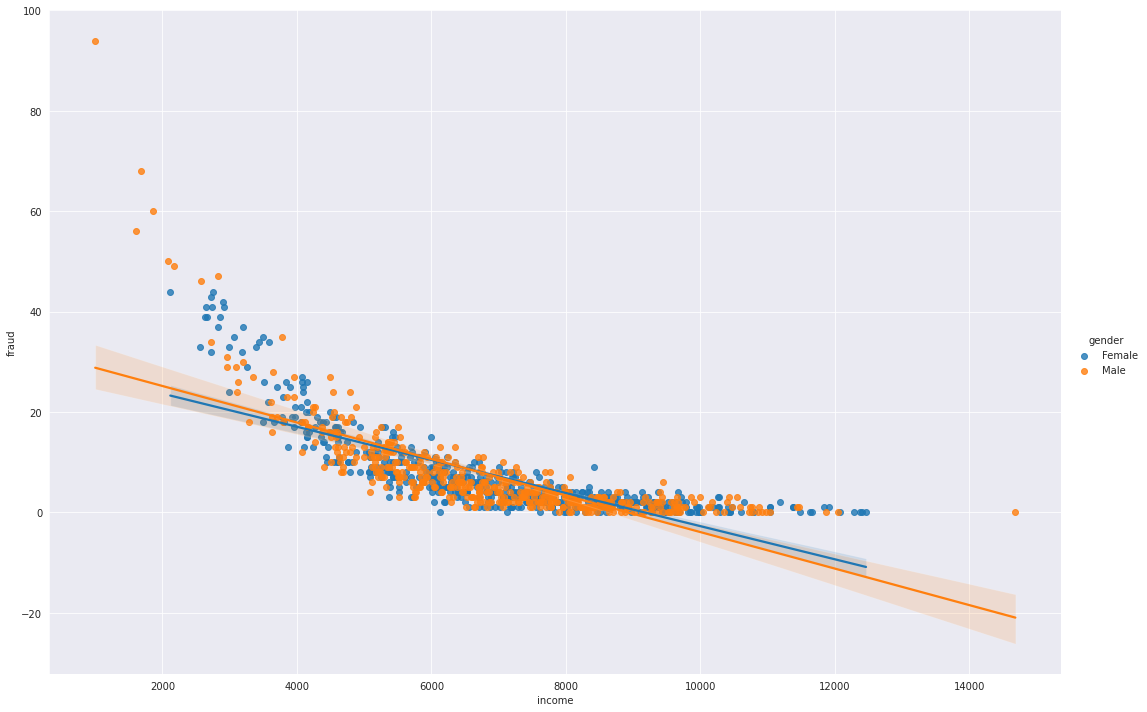

In [ ]:
sns.lmplot(x='income', y='fraud', hue='gender', data=data, height=10, aspect=1.5)

### b) Use Maximum Likelihood to estimate the β parameters

In [ ]:
print(Poisson(fraud, X).fit().summary())

Optimization terminated successfully.
         Current function value: 2.148991
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                        Poisson   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.6116
Time:                        18:42:45   Log-Likelihood:                -2149.0
converged:                       True   LL-Null:                       -5533.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cons           5.0125      0.036    138.431      0.000       4.941       5.083
income        -0.0005   6.37e-06    -79.493      0.000      -0.001      -0.000
female         0.0014      0.023      0.059      0.953      -0.045       0.047
==============================================================================
"""

### c) What do you conclude
 

 It can be seen that the Maximum Likelihood estimation does a much better job in finding coefficients that approximate the true population parameters. The intercept and $\beta_1$ are nearly identical to the true values.

The linear regression, on the other hand, has to overestimate the intercept to account for outliers generated by the non-linear effect. This generates bias in the estimates, especially towards the tails of the distribution, as it can be seen in the regression plot (which is a mere approximation of our linear model, since the female dummy is an intercept shifter in our model, but is represented as a slope shifter in the plot). 

Evidently, we should utilize the Maximum Likelihood Estimator.